In [3]:
import networkx as nx

import matplotlib.pyplot as plt

In [4]:
# 関数定義
def my_Bellman_Ford(G:nx.classes.digraph.DiGraph, s: int):

    # nodeの数を取得
    n = nx.number_of_nodes(G)

    # 長さnのリストDを無限で初期化
    D = [float('inf')]*n

    # スタート点の値を0にする
    D[s] = 0

    # 1~n-1まで以下を実行する。
    for s in range(1, n):

        # 直前の結果DをD_newにコピー
        D_new = D[:]

        # 辺(u, v)を取得
        for u, v in G.edges():

            # 直前のuの値＋辺(u, v)の重みをnew_distanceに代入
            new_distance = D[u] + G.edges[u, v]['weight']

            # 現在のvの値がnew_distanceより大きいとき
            if D_new[v] > new_distance:

                # 現在のvの値をnew_distanceに変更
                D_new[v] = new_distance

        # Dを更新
        D = D_new
    
    # 辺(u, v)を取得
    for u, v in G.edges():

        # 直前のuの値＋辺(u, v)の重みをnew_distanceに代入
        new_distance = D[u] + G.edges[u, v]['weight']

        # 現在のvの値がnew_distanceより大きいとき
        if D[v]> new_distance:

            # 無効な問題であることを返す。
            return (False, D)

    # 有効な問題であることと解(D)を返す。
    return (True, D)

In [5]:
G = nx.read_weighted_edgelist('bf.edgelist', create_using=nx.DiGraph(), nodetype=int)

flag, D = my_Bellman_Ford(G, 0)
print(flag)
print(D)

True
[0, 3.0, 5.0, 2.0, 4.0, 7.0, 6.0]


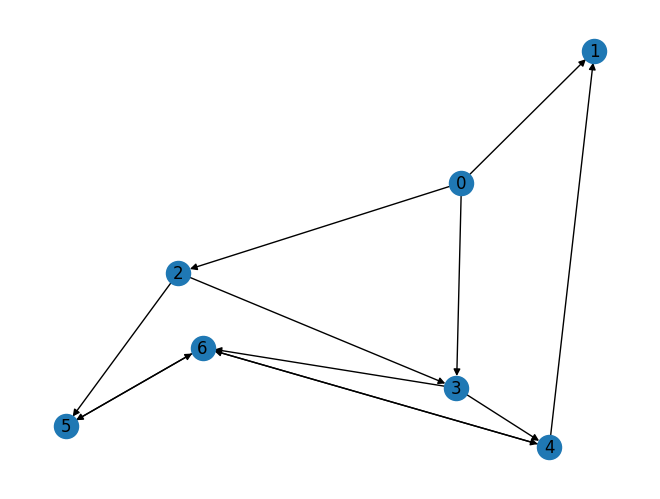

In [13]:
nx.draw(G, with_labels = True)
plt.show()